# การวิเคราะห์ model KNN โตยใช้ข้อมูลการสั่งของ รวมกรณีไม่สั่ง ค่าที่ predict จะเท่ากับ 0

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
df = pd.DataFrame(np.random.randint(0,5,size=(5000, 4)), columns=list('ABCD'))

In [3]:
df['qty'] = df.apply(lambda row: (row.A + row.B + row.C) - row.D, axis = 1)

In [4]:
print(df.head(5))

   A  B  C  D  qty
0  4  4  4  2   10
1  0  0  1  3   -2
2  1  3  3  3    4
3  3  2  3  0    8
4  2  2  2  2    4


In [5]:
df[df['qty']<0]

,A,B,C,D,qty
1,0,0,1,3,-2
25,0,2,0,4,-2
31,0,3,0,4,-1
36,0,2,0,4,-2
42,0,0,3,4,-1
...,...,...,...,...,...
4949,0,0,2,3,-1
4962,1,0,1,3,-1
4973,0,0,1,3,-2
4985,2,0,0,3,-1


In [6]:
df.loc[df['qty']<0, 'qty'] = 0

In [7]:
#df[df['qty']==0]

In [8]:
X = df.drop('qty',axis = 1)

In [9]:
X.head(5)

,A,B,C,D
0,4,4,4,2
1,0,0,1,3
2,1,3,3,3
3,3,2,3,0
4,2,2,2,2


In [10]:
Y = df['qty']

In [11]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=4)

In [12]:
x_train.shape

(4000, 4)

In [13]:
y_train.shape

(4000,)

In [14]:
# KNN Classifier
k_range = range(1,100)
scores = {}
scores_list = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    y_pred = knn.predict(x_test)
    scores[k] = metrics.accuracy_score(y_test, y_pred)
    scores_list.append(metrics.accuracy_score(y_test, y_pred))

Text(0, 0.5, 'Testing Accuracy')

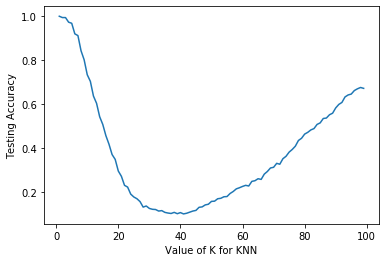

In [15]:
#vPlot data Accuracy
plt.plot(k_range, scores_list)
plt.xlabel("Value of K for KNN")
plt.ylabel("Testing Accuracy")

Text(0, 0.5, 'Testing Accuracy')

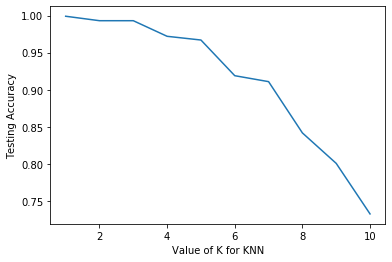

In [16]:
#vPlot data Accuracy
plt.plot(k_range[:10], scores_list[:10])
plt.xlabel("Value of K for KNN")
plt.ylabel("Testing Accuracy")

In [17]:
print(k_range[:10], scores_list[:10])

range(1, 11) [0.999, 0.993, 0.993, 0.972, 0.967, 0.919, 0.911, 0.842, 0.801, 0.733]


In [18]:
print(str(max(scores_list[2:])))

0.993


In [19]:
print(k_range[2], scores_list[2])

3 0.993
